In [20]:
import matplotlib.pyplot as plt
import numpy as np

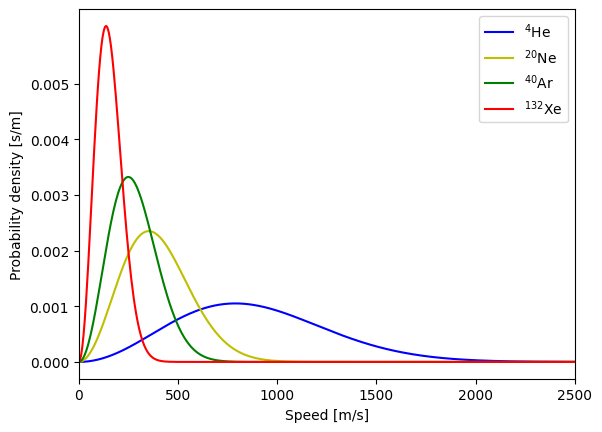

In [21]:
#1.

def f(m, v):
    m = (2 * int(m) * 1e-3) / (6.02e23)
    kB = 1.38e-23
    T = 300
    a = (m / (2 * np.pi * kB * T)) **1.5 * ((4 * np.pi * (v**2)) * np.exp((-m * (v**2))/ (2 * kB * T)))
    return a

v = np.linspace(0, 3000, 500)
m = [4, 20, 40, 132]
color = ['b', 'y', 'g','r']
labels = ['$^4$He', '$^{20}$Ne', '$^{40}$Ar', '$^{132}$Xe']

for i in range(len(m)):
    P = f(m[i], v)
    plt.plot(v, P, color = color[i], label = labels[i])

plt.xlim(0, 2500)

plt.xticks([0, 500, 1000, 1500, 2000, 2500], fontsize =10)
plt.yticks([0.000, 0.001, 0.002, 0.003, 0.004, 0.005], fontsize =10)

plt.xlabel("Speed [m/s]", fontsize =10)
plt.ylabel("Probability density [s/m]", fontsize = 10)

plt.legend(fontsize = 10)

In [22]:
ddata = np.loadtxt("disk_position.txt")
ddata

array([[ 1.65807  , -2.31815  ,  0.134961 ],
       [ 0.400521 ,  0.836046 ,  0.292063 ],
       [ 2.97996  ,  1.0594   ,  0.285867 ],
       ...,
       [ 3.23688  , -0.912582 , -0.0521733],
       [ 0.629297 , -1.1099   , -0.283854 ],
       [ 2.25962  ,  2.03629  , -0.0485039]])

In [23]:
ddata = np.loadtxt("halo_position.txt")
ddata

array([[ 0.482326, -0.433048,  0.132125],
       [ 0.240496,  0.38818 ,  5.59403 ],
       [-4.31345 ,  3.38246 , -0.862228],
       ...,
       [ 0.854912,  3.31048 , -5.58397 ],
       [ 0.516328,  1.51411 , -6.6711  ],
       [ 1.55202 , -0.798746,  1.37808 ]])

([<matplotlib.axis.YTick at 0x19261a48150>,
 [Text(0, -10, '−10'),
  Text(0, -5, '−5'),
  Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10')])

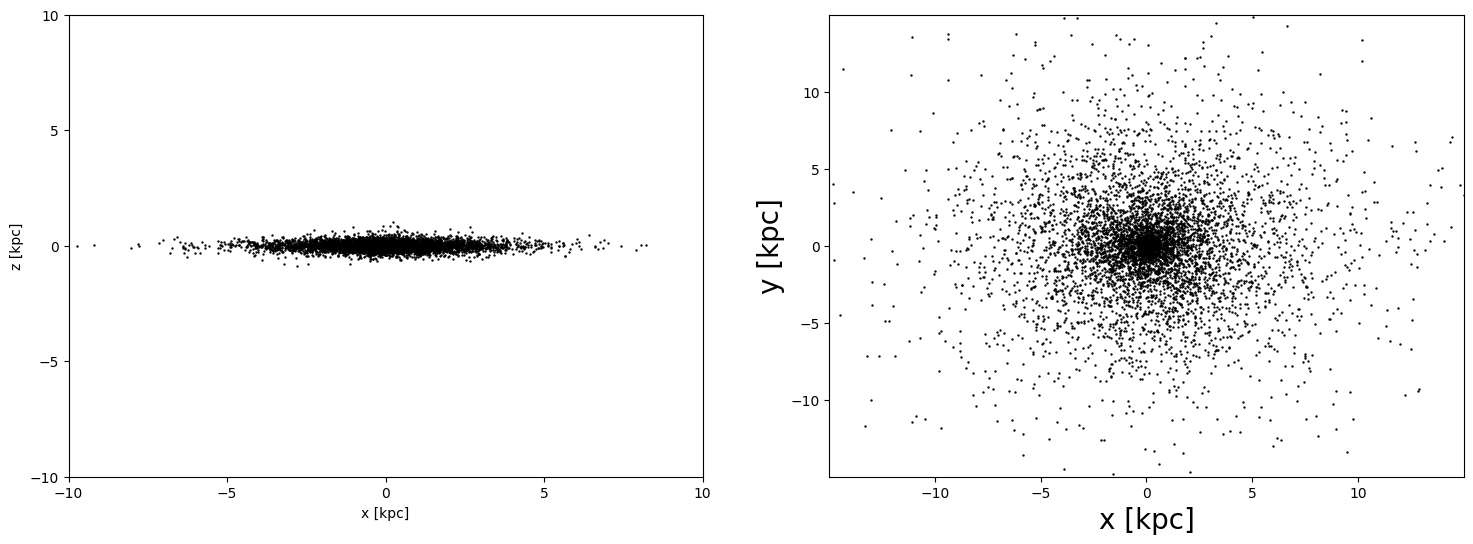

In [24]:
#2.
d = open("disk_position.txt", 'r')
h = open("halo_position.txt", 'r')

ddata = np.loadtxt("disk_position.txt", float)
dx = ddata[:, 0]
dz = ddata[:, 2]

hdata = np.loadtxt("halo_position.txt", float)
hx = hdata[:, 0]
hy = hdata[:, 1]

d.close()
h.close()

plt.figure(figsize = (18, 6))

plt.subplot(1, 2, 1)
plt.scatter(dx, dz, color = 'black', s = 0.5)
plt.xlabel("x [kpc]", fontsize = 10)
plt.ylabel("z [kpc]", fontsize = 10)
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.xticks([-10, -5, 0 , 5, 10], fontsize = 10)
plt.yticks([-10, -5, 0, 5, 10], fontsize =10)

plt.subplot(1, 2, 2)
plt.scatter(hx, hy, color = 'black', s= 0.5)
plt.xlabel("x [kpc]", fontsize = 20)
plt.ylabel("y [kpc]", fontsize = 20)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xticks([-10, -5, 0 , 5, 10], fontsize = 10)
plt.yticks([-10, -5, 0, 5, 10], fontsize = 10)

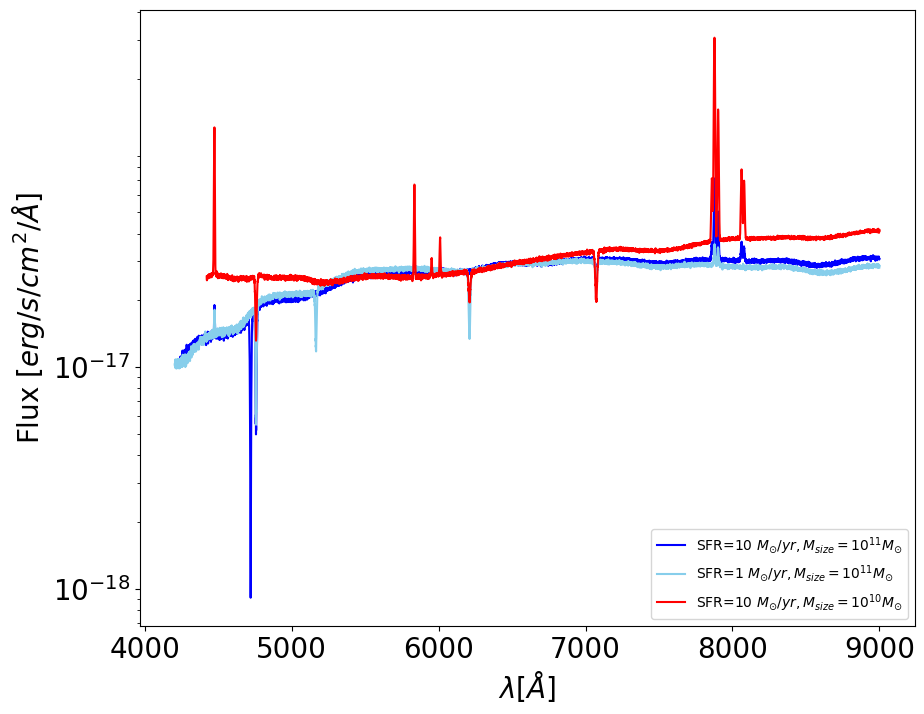

In [25]:
f_blue = open("gal_spec.txt",'r')
f_red = open("gal_spec_M10.txt",'r')
f_skyblue = open("gal_spec_sfr_1.txt",'r')
header_blue = f_blue.readline()
header_red = f_red.readline()
header_skyblue = f_skyblue.readline()

wavelength_blue = []
flux_blue = []

for line in f_blue:
    line = line.strip()
    columns = line.split()
    if columns[0] != 'NA' and columns[1] != 'NA':
        wavelength_blue.append(float(columns[0]))
        flux_blue.append(float(columns[1]))
f_blue.close()

wavelength_red = []
flux_red = []

for line in f_red:
    line = line.strip()
    columns = line.split()
    if columns[0] != 'NA' and columns[1] != 'NA':
        wavelength_red.append(float(columns[0]))
        flux_red.append(float(columns[1]))
f_red.close()

wavelength_skyblue = []
flux_skyblue = []

for line in f_skyblue:
    line = line.strip()
    columns = line.split()
    if columns[0] != 'NA' and columns[1] != 'NA':
        wavelength_skyblue.append(float(columns[0]))
        flux_skyblue.append(float(columns[1]))
f_skyblue.close()

plt.figure(figsize=(10,8))
for i in range(3):
    wavelength = [wavelength_blue, wavelength_skyblue, wavelength_red]
    flux = [flux_blue, flux_skyblue, flux_red]
    color = ['blue', 'skyblue', 'red']
    label = [r"SFR=10 $M_{\odot}/yr, M_{size} = 10^{11} M_{\odot}$", r"SFR=1 $M_{\odot}/yr, M_{size} = 10^{11} M_{\odot}$", r"SFR=10 $M_{\odot}/yr, M_{size} = 10^{10} M_{\odot}$"]
    x_ticks = [1000*(x+4) for x in range(6)]
    y_ticks = [1e-18, 1e-17]
    plt.semilogy(wavelength[i], flux[i], '-', c=color[i], label = label[i])
    plt.xticks(x_ticks, fontsize = 20)
    plt.yticks(y_ticks, fontsize = 20)
    plt.xlabel(r"$\lambda [\AA]$", fontsize = 20)
    plt.ylabel(r"Flux [$erg/s/cm^2/\AA$]", fontsize = 20)
    plt.legend(loc = 4)   